# Annual Report Statistics - Analysis
After we **manually** evaluated some company annual reports and proxy filings, we now analyze the results.

In [1]:
from HelperFunctions import loadObject, dumpObject, writeDataFrameToExcel
from Definitions import EXCEL_FILES_DIR
import pandas as pd
import matplotlib.pyplot as plt
import warnings
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.max_rows', 20) # Show all rows

In [2]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>

## Loading results

In [3]:
df_results = pd.read_excel(EXCEL_FILES_DIR / "SampleForDateAnalysis.xlsx")
df_results

Unnamed: 0             lts_company name  13dg_cik_sc  data available  \
0          148               NOBLE CORP PLC      1458891               1   
1         2689       LOUISIANA-PACIFIC CORP        60519               1   
2         7874           SALESFORCE.COM INC      1108524               1   
3         7807                CIT GROUP INC      1171825               1   
4         6709  HARTFORD FINANCIAL SERVICES       874766               1   
..         ...                          ...          ...             ...   
85        1321            CONAGRA FOODS INC        23217               1   
86        1552    DONNELLEY (R R) & SONS CO        29669               1   
87        6470           REALTY INCOME CORP       726728               1   
88        1653              PERKINELMER INC        31791               1   
89        7991     DIGITAL REALTY TRUST INC      1297996               1   

   comment  lts_finYear fc_enddate  fc_month lts_correctedDate  \
0      NaN       2019.0 2019-12-31      12.0               NaT   
1      NaN       2019.0 2019-12-31      12.0               NaT   
2      NaN       2019.0 2019-01-31       1.0               NaT   
3      NaN       2019.0 2019-12-31      12.0               NaT   
4      NaN       2019.0 2019-12-31      12.0               NaT   
..     ...          ...        ...       ...               ...   
85     NaN       2019.0 2019-05-26       5.0               NaT   
86     NaN       2019.0 2019-12-31      12.0        2020-04-30   
87     NaN       2019.0 2019-12-31      12.0               NaT   
88     NaN       2019.0 2019-12-29      12.0               NaT   
89     NaN       2019.0 2019-12-31      12.0               NaT   

               lts_date                                annualReport_source  \
0                   NaN  http://www.annualreports.com/HostedData/Annual...   
1                   NaN  http://www.annualreports.com/HostedData/Annual...   
2                   NaN  https://s23.q4cdn.com/574569502/files/doc_fina...   
3                   NaN  http://www.annualreports.com/HostedData/Annual...   
4                   NaN  https://www.sec.gov/Archives/edgar/data/874766...   
..                  ...                                                ...   
85                  NaN  https://materials.proxyvote.com/Approved/20588...   
86  2020-04-01 00:00:00  https://s1.q4cdn.com/664789261/files/doc_finan...   
87                  NaN  https://s21.q4cdn.com/421822989/files/doc_fina...   
88                  NaN  https://ir.perkinelmer.com/static-files/e8f711...   
89                  NaN  https://www.sec.gov/Archives/edgar/data/129799...   

     agm_date  agm_year  agm_month  \
0  2020-05-21    2020.0        5.0   
1  2020-05-22    2020.0        5.0   
2  2019-06-06    2019.0        6.0   
3  2020-05-12    2020.0        5.0   
4  2020-05-20    2020.0        5.0   
..        ...       ...        ...   
85 2019-09-19    2019.0        9.0   
86 2020-05-14    2020.0        5.0   
87 2020-05-12    2020.0        5.0   
88 2020-04-28    2020.0        4.0   
89 2020-06-08    2020.0        6.0   

                                           agm_source  
0   https://markets.businessinsider.com/stocks/ne/...  
1   https://markets.businessinsider.com/stocks/lpx...  
2   https://s23.q4cdn.com/574569502/files/doc_fina...  
3   https://markets.businessinsider.com/stocks/cit...  
4   https://markets.businessinsider.com/stocks/hig...  
..                                                ...  
85  https://materials.proxyvote.com/default.aspx?d...  
86  https://s1.q4cdn.com/664789261/files/doc_finan...  
87  https://s21.q4cdn.com/421822989/files/doc_fina...  
88  https://ir.perkinelmer.com/static-files/496536...  
89  https://www.sec.gov/Archives/edgar/data/129799...  

[90 rows x 15 columns]

## Prepare data for analysis
Let's drop only select the important column that we want to analyse. Let's also adjust the datatypes.

In [4]:
relevant_columns = [
    "lts_company name",
    "13dg_cik_sc",
    "data available",
    "lts_finYear",
    "fc_enddate",
    "fc_month",
    "lts_correctedDate",
    "agm_date",
    "agm_year",
    "agm_month"
]
df_results_filtered = df_results[relevant_columns]

df_results_filtered

lts_company name  13dg_cik_sc  data available  lts_finYear  \
0                NOBLE CORP PLC      1458891               1       2019.0   
1        LOUISIANA-PACIFIC CORP        60519               1       2019.0   
2            SALESFORCE.COM INC      1108524               1       2019.0   
3                 CIT GROUP INC      1171825               1       2019.0   
4   HARTFORD FINANCIAL SERVICES       874766               1       2019.0   
..                          ...          ...             ...          ...   
85            CONAGRA FOODS INC        23217               1       2019.0   
86    DONNELLEY (R R) & SONS CO        29669               1       2019.0   
87           REALTY INCOME CORP       726728               1       2019.0   
88              PERKINELMER INC        31791               1       2019.0   
89     DIGITAL REALTY TRUST INC      1297996               1       2019.0   

   fc_enddate  fc_month lts_correctedDate   agm_date  agm_year  agm_month  
0  2019-12-31      12.0               NaT 2020-05-21    2020.0        5.0  
1  2019-12-31      12.0               NaT 2020-05-22    2020.0        5.0  
2  2019-01-31       1.0               NaT 2019-06-06    2019.0        6.0  
3  2019-12-31      12.0               NaT 2020-05-12    2020.0        5.0  
4  2019-12-31      12.0               NaT 2020-05-20    2020.0        5.0  
..        ...       ...               ...        ...       ...        ...  
85 2019-05-26       5.0               NaT 2019-09-19    2019.0        9.0  
86 2019-12-31      12.0        2020-04-30 2020-05-14    2020.0        5.0  
87 2019-12-31      12.0               NaT 2020-05-12    2020.0        5.0  
88 2019-12-29      12.0               NaT 2020-04-28    2020.0        4.0  
89 2019-12-31      12.0               NaT 2020-06-08    2020.0        6.0  

[90 rows x 10 columns]

Out of the 90 random picks, let's how many companies we could successfully analyze:

In [5]:
df_results_filtered["data available"].value_counts()

1    73
0    17
Name: data available, dtype: int64

As we can see, there are 73 companies that we could analyze.
For the following analysis, let's focus on these companies.

In [6]:
df_results_filtered = df_results_filtered[df_results_filtered["data available"] == 1]
df_results_filtered

lts_company name  13dg_cik_sc  data available  lts_finYear  \
0                NOBLE CORP PLC      1458891               1       2019.0   
1        LOUISIANA-PACIFIC CORP        60519               1       2019.0   
2            SALESFORCE.COM INC      1108524               1       2019.0   
3                 CIT GROUP INC      1171825               1       2019.0   
4   HARTFORD FINANCIAL SERVICES       874766               1       2019.0   
..                          ...          ...             ...          ...   
85            CONAGRA FOODS INC        23217               1       2019.0   
86    DONNELLEY (R R) & SONS CO        29669               1       2019.0   
87           REALTY INCOME CORP       726728               1       2019.0   
88              PERKINELMER INC        31791               1       2019.0   
89     DIGITAL REALTY TRUST INC      1297996               1       2019.0   

   fc_enddate  fc_month lts_correctedDate   agm_date  agm_year  agm_month  
0  2019-12-31      12.0               NaT 2020-05-21    2020.0        5.0  
1  2019-12-31      12.0               NaT 2020-05-22    2020.0        5.0  
2  2019-01-31       1.0               NaT 2019-06-06    2019.0        6.0  
3  2019-12-31      12.0               NaT 2020-05-12    2020.0        5.0  
4  2019-12-31      12.0               NaT 2020-05-20    2020.0        5.0  
..        ...       ...               ...        ...       ...        ...  
85 2019-05-26       5.0               NaT 2019-09-19    2019.0        9.0  
86 2019-12-31      12.0        2020-04-30 2020-05-14    2020.0        5.0  
87 2019-12-31      12.0               NaT 2020-05-12    2020.0        5.0  
88 2019-12-29      12.0               NaT 2020-04-28    2020.0        4.0  
89 2019-12-31      12.0               NaT 2020-06-08    2020.0        6.0  

[73 rows x 10 columns]

Let's now also adjust the datatypes.

In [7]:
warnings.filterwarnings("ignore")
df_results_filtered["lts_finYear"] = df_results_filtered["lts_finYear"].astype(int)
df_results_filtered["fc_month"] = df_results_filtered["fc_month"].astype(int)
df_results_filtered["agm_year"] = df_results_filtered["agm_year"].astype(int)
df_results_filtered["agm_month"] = df_results_filtered["agm_month"].astype(int)
df_results_filtered.dtypes

lts_company name             object
13dg_cik_sc                   int64
data available                int64
lts_finYear                   int32
fc_enddate           datetime64[ns]
fc_month                      int32
lts_correctedDate    datetime64[ns]
agm_date             datetime64[ns]
agm_year                      int32
agm_month                     int32
dtype: object

Before we start analyzing the data, let's make sure, that all data points correspond to the finYear 2019.

In [8]:
df_results_filtered["lts_finYear"].value_counts()

2019    73
Name: lts_finYear, dtype: int64

Look good : )
## Analysis of AGM Date
First let's look at the basic statistic.

In [9]:
df_results_filtered["agm_date"].describe()

count                      73
unique                     39
top       2020-05-20 00:00:00
freq                        7
first     2019-05-22 00:00:00
last      2020-06-29 00:00:00
Name: agm_date, dtype: object

In [10]:
mean_date = df_results_filtered["agm_date"].mean()
print(f"The mean date is: {mean_date}")

The mean date is: 2020-04-10 12:29:35.342465792


Now to make it easier to group and visualize this data, let's add a column, where we only have the month and the year of the AGM.

In [11]:
df_results_filtered["agm_yyyy_mm"] = list(map(lambda date: date.strftime('%Y-%m'), df_results_filtered["agm_date"]))
df_results_filtered

lts_company name  13dg_cik_sc  data available  lts_finYear  \
0                NOBLE CORP PLC      1458891               1         2019   
1        LOUISIANA-PACIFIC CORP        60519               1         2019   
2            SALESFORCE.COM INC      1108524               1         2019   
3                 CIT GROUP INC      1171825               1         2019   
4   HARTFORD FINANCIAL SERVICES       874766               1         2019   
..                          ...          ...             ...          ...   
85            CONAGRA FOODS INC        23217               1         2019   
86    DONNELLEY (R R) & SONS CO        29669               1         2019   
87           REALTY INCOME CORP       726728               1         2019   
88              PERKINELMER INC        31791               1         2019   
89     DIGITAL REALTY TRUST INC      1297996               1         2019   

   fc_enddate  fc_month lts_correctedDate   agm_date  agm_year  agm_month  \
0  2019-12-31        12               NaT 2020-05-21      2020          5   
1  2019-12-31        12               NaT 2020-05-22      2020          5   
2  2019-01-31         1               NaT 2019-06-06      2019          6   
3  2019-12-31        12               NaT 2020-05-12      2020          5   
4  2019-12-31        12               NaT 2020-05-20      2020          5   
..        ...       ...               ...        ...       ...        ...   
85 2019-05-26         5               NaT 2019-09-19      2019          9   
86 2019-12-31        12        2020-04-30 2020-05-14      2020          5   
87 2019-12-31        12               NaT 2020-05-12      2020          5   
88 2019-12-29        12               NaT 2020-04-28      2020          4   
89 2019-12-31        12               NaT 2020-06-08      2020          6   

   agm_yyyy_mm  
0      2020-05  
1      2020-05  
2      2019-06  
3      2020-05  
4      2020-05  
..         ...  
85     2019-09  
86     2020-05  
87     2020-05  
88     2020-04  
89     2020-06  

[73 rows x 11 columns]

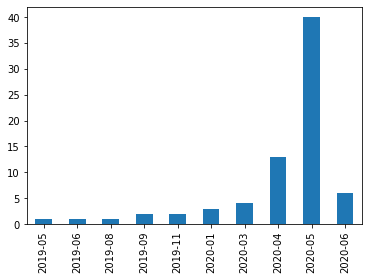

In [12]:
fig, ax = plt.subplots()
df_results_filtered["agm_yyyy_mm"].value_counts().sort_index().plot(ax=ax, kind='bar')

Now let's look at the specific numbers.

In [25]:
df_results_filtered["agm_yyyy_mm"].value_counts().sort_index()

2019-05     1
2019-06     1
2019-08     1
2019-09     2
2019-11     2
2020-01     3
2020-03     4
2020-04    13
2020-05    40
2020-06     6
Name: agm_yyyy_mm, dtype: int64

## Analysis of End of the Year
Now, let's look at the data found for the end of the financial year.

In [14]:
df_results_filtered["fc_enddate"].describe()

count                      73
unique                     12
top       2019-12-31 00:00:00
freq                       51
first     2019-01-27 00:00:00
last      2020-02-01 00:00:00
Name: fc_enddate, dtype: object

In [15]:
mean_date = df_results_filtered["fc_enddate"].mean()
print(f"The mean date is: {mean_date}")

The mean date is: 2019-11-28 13:48:29.589041152


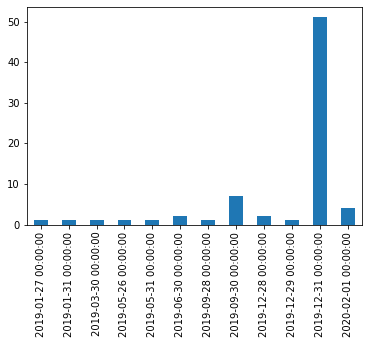

In [16]:
fig, ax = plt.subplots()
df_results_filtered["fc_enddate"].value_counts().sort_index().plot(ax=ax, kind='bar')

Let's have a look at the concrete values:

In [17]:
df_results_filtered["fc_enddate"].value_counts()

2019-12-31    51
2019-09-30     7
2020-02-01     4
2019-12-28     2
2019-06-30     2
2019-01-31     1
2019-05-26     1
2019-12-29     1
2019-01-27     1
2019-03-30     1
2019-05-31     1
2019-09-28     1
Name: fc_enddate, dtype: int64

We can see, that we have three groups.

In [18]:
print(f"There are {51} companies, whose financial year ends exactly on the 31st Dec. This is equates to {str(100*(51/73))[:5]}%.")
print(f"There are {4} companies, whose financial year ends after the 31st Dec. This is equates to {str(100*(4/73))[:5]}%.")
print(f"There are {73-51-4} companies, whose financial year ends before the 31st Dec. This is equates to {str(100*((73-51-4)/73))[:5]}%.")

There are 51 companies, whose financial year ends exactly on the 31st Dec. This is equates to 69.86%.
There are 4 companies, whose financial year ends after the 31st Dec. This is equates to 5.479%.
There are 18 companies, whose financial year ends before the 31st Dec. This is equates to 24.65%.


## Analysis of LTS Date
Let's see for how many datapoints we have information on the LTS date.

In [19]:
df_results_filtered["lts_correctedDate"].isna().value_counts()

True     63
False    10
Name: lts_correctedDate, dtype: int64

We therefore have 10 entries with data on the LTS date.

In [20]:
df_results_filtered_ltsDate = df_results_filtered[df_results_filtered["lts_correctedDate"].notna()]
df_results_filtered_ltsDate

lts_company name  13dg_cik_sc  data available  lts_finYear  \
12                NVIDIA CORP      1045810               1         2019   
16       ZIONS BANCORPORATION       109380               1         2019   
22                  HESS CORP         4447               1         2019   
34         OWENS-ILLINOIS INC       812074               1         2019   
39         UNITED RENTALS INC      1067701               1         2019   
45     BOSTON SCIENTIFIC CORP       885725               1         2019   
71          LAM RESEARCH CORP       707549               1         2019   
73            F5 NETWORKS INC      1048695               1         2019   
78           UNDER ARMOUR INC      1336917               1         2019   
86  DONNELLEY (R R) & SONS CO        29669               1         2019   

   fc_enddate  fc_month lts_correctedDate   agm_date  agm_year  agm_month  \
12 2019-01-27         1        2019-04-30 2019-05-22      2019          5   
16 2019-12-31        12        2020-02-12 2020-05-01      2020          5   
22 2019-12-31        12        2020-04-30 2020-06-03      2020          6   
34 2019-12-31        12        2020-04-01 2020-05-12      2020          5   
39 2019-12-31        12        2020-03-24 2020-05-07      2020          5   
45 2019-12-31        12        2020-03-10 2020-05-07      2020          5   
71 2019-06-30         6        2019-09-06 2019-11-05      2019         11   
73 2019-09-30         9        2020-01-31 2020-03-12      2020          3   
78 2019-12-31        12        2020-04-14 2020-05-27      2020          5   
86 2019-12-31        12        2020-04-30 2020-05-14      2020          5   

   agm_yyyy_mm  
12     2019-05  
16     2020-05  
22     2020-06  
34     2020-05  
39     2020-05  
45     2020-05  
71     2019-11  
73     2020-03  
78     2020-05  
86     2020-05

Let's look at the timely distribution.

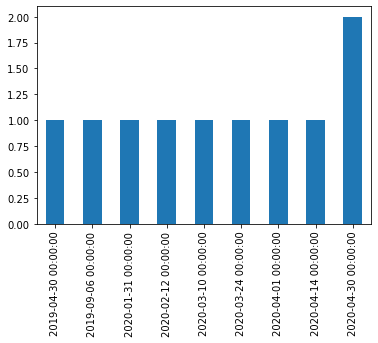

In [21]:
fig, ax = plt.subplots()
df_results_filtered_ltsDate["lts_correctedDate"].value_counts().sort_index().plot(ax=ax, kind='bar')

Let's now compute the difference in days between the date of the LTS and the date of the AGM.

In [22]:
df_results_filtered_ltsDate["nr_days_lts_before_agm"] = list(map(lambda lts,agm: agm-lts, df_results_filtered_ltsDate["lts_correctedDate"], df_results_filtered_ltsDate["agm_date"]))
df_results_filtered_ltsDate

lts_company name  13dg_cik_sc  data available  lts_finYear  \
12                NVIDIA CORP      1045810               1         2019   
16       ZIONS BANCORPORATION       109380               1         2019   
22                  HESS CORP         4447               1         2019   
34         OWENS-ILLINOIS INC       812074               1         2019   
39         UNITED RENTALS INC      1067701               1         2019   
45     BOSTON SCIENTIFIC CORP       885725               1         2019   
71          LAM RESEARCH CORP       707549               1         2019   
73            F5 NETWORKS INC      1048695               1         2019   
78           UNDER ARMOUR INC      1336917               1         2019   
86  DONNELLEY (R R) & SONS CO        29669               1         2019   

   fc_enddate  fc_month lts_correctedDate   agm_date  agm_year  agm_month  \
12 2019-01-27         1        2019-04-30 2019-05-22      2019          5   
16 2019-12-31        12        2020-02-12 2020-05-01      2020          5   
22 2019-12-31        12        2020-04-30 2020-06-03      2020          6   
34 2019-12-31        12        2020-04-01 2020-05-12      2020          5   
39 2019-12-31        12        2020-03-24 2020-05-07      2020          5   
45 2019-12-31        12        2020-03-10 2020-05-07      2020          5   
71 2019-06-30         6        2019-09-06 2019-11-05      2019         11   
73 2019-09-30         9        2020-01-31 2020-03-12      2020          3   
78 2019-12-31        12        2020-04-14 2020-05-27      2020          5   
86 2019-12-31        12        2020-04-30 2020-05-14      2020          5   

   agm_yyyy_mm nr_days_lts_before_agm  
12     2019-05                22 days  
16     2020-05                79 days  
22     2020-06                34 days  
34     2020-05                41 days  
39     2020-05                44 days  
45     2020-05                58 days  
71     2019-11                60 days  
73     2020-03                41 days  
78     2020-05                43 days  
86     2020-05                14 days

Let's figure out the usual timespan between the LTS and the AGM.

In [23]:
df_results_filtered_ltsDate["nr_days_lts_before_agm"].describe()

count                         10
mean            43 days 14:24:00
std      18 days 19:01:06.251419
min             14 days 00:00:00
25%             35 days 18:00:00
50%             42 days 00:00:00
75%             54 days 12:00:00
max             79 days 00:00:00
Name: nr_days_lts_before_agm, dtype: object

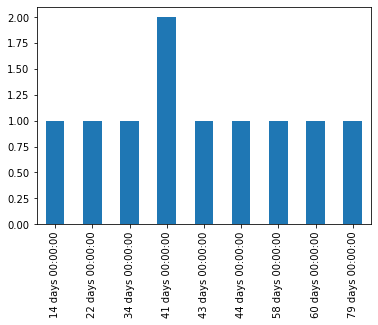

In [26]:
fig, ax = plt.subplots()
df_results_filtered_ltsDate["nr_days_lts_before_agm"].value_counts().sort_index().plot(ax=ax, kind='bar')

In [27]:
df_results_filtered_ltsDate["nr_days_lts_before_agm"].value_counts().sort_index()

14 days    1
22 days    1
34 days    1
41 days    2
43 days    1
44 days    1
58 days    1
60 days    1
79 days    1
Name: nr_days_lts_before_agm, dtype: int64

As we can see, the mean value is 43 days.  
It is important to note, that all three entries that show less than 41 days, are subject to an error as all vague entries (e.g. April 2020) have been conservatively corrected to the lastest possible date (end of the month, e.g. 30. April 2020).
We can therefore estimate that shareholders receive their LTS at least one month prior to the AGM.